In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [64]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


*   Age: age of the patient [years]
*   Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

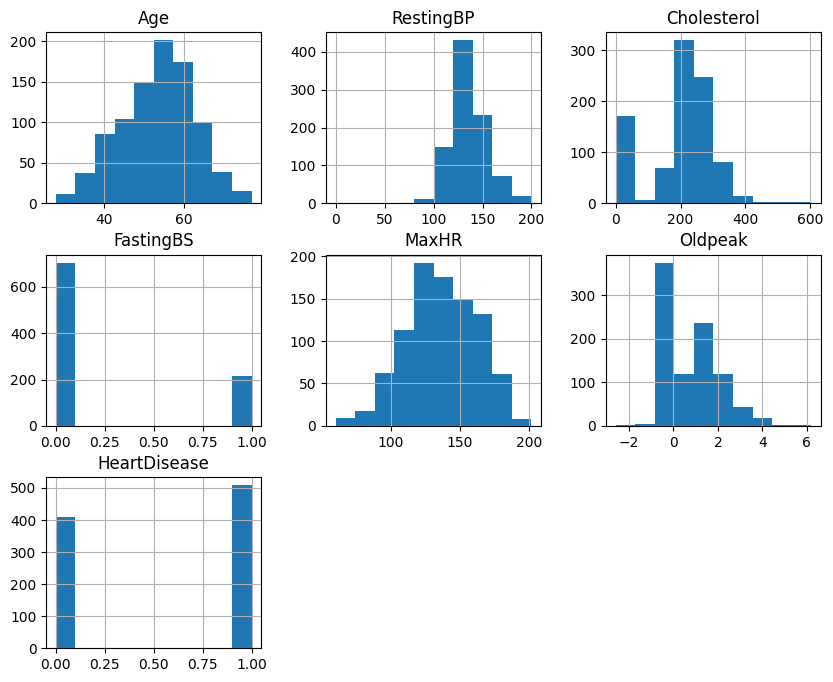

In [10]:
data.hist(figsize=(10, 8))

In this research most peaople were in the age of 57 so this may affect the number of diseases.

In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We don't have any NA

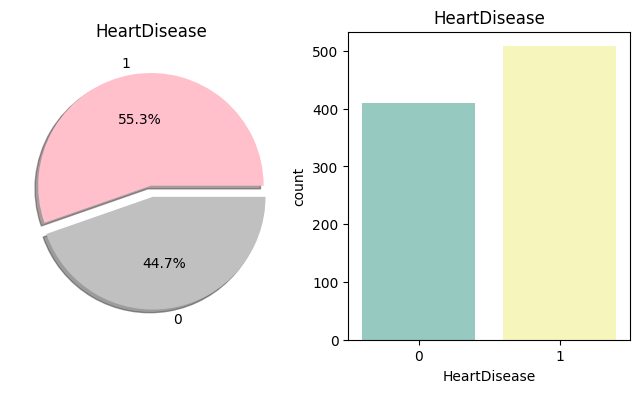

In [11]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# Piechart for the first subplot
data['HeartDisease'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['pink', 'silver'])
ax[0].set_title('HeartDisease')
ax[0].set_ylabel('')

# Countplot for the second subplot
sns.countplot(data, x='HeartDisease', ax=ax[1], palette='Set3')
ax[1].set_title('HeartDisease')

plt.show()


We can see that in our dataset we have almost rhe same quantity of peolpe with and without heart diesease.

In [13]:
pd.crosstab(data.Sex, data.HeartDisease, margins=True).style.background_gradient(cmap='summer_r')

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


From this table we see that it is more likely for men to have a HeartDisease than for women. However we can see that in this study much more men toot part.

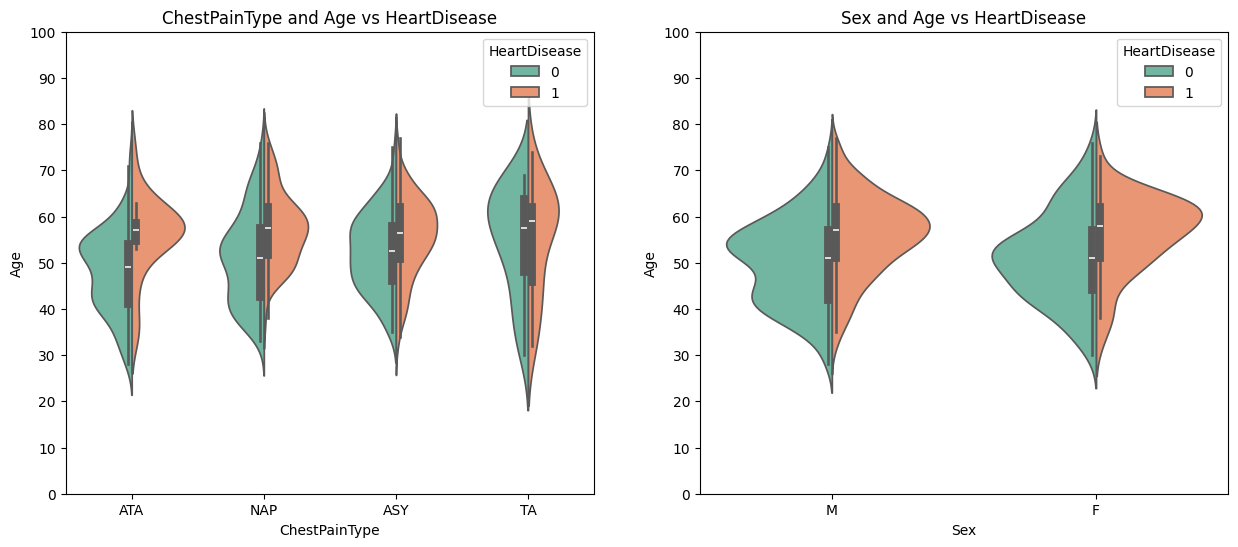

In [19]:
f, ax=plt.subplots(1,2, figsize=(15,6))

sns.violinplot(data, x="ChestPainType", y="Age", hue="HeartDisease", split=True, ax=ax[0], palette="Set2")
ax[0].set_title('ChestPainType and Age vs HeartDisease')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data, x="Sex", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="Set2")
ax[1].set_title('Sex and Age vs HeartDisease')
ax[1].set_yticks(range(0, 110, 10))

plt.show()


From the 1 plot we can see that before +- 60 years ATA paint is not that dangerous as after. More or less the same picture with NAP, but there are a bit more people in danger from 40 years old. And more or less the same distribution with TA pain.
From the 2 plot we see that men have 2 distribution peaks. Women face with HeartDisease a little bit later then men.

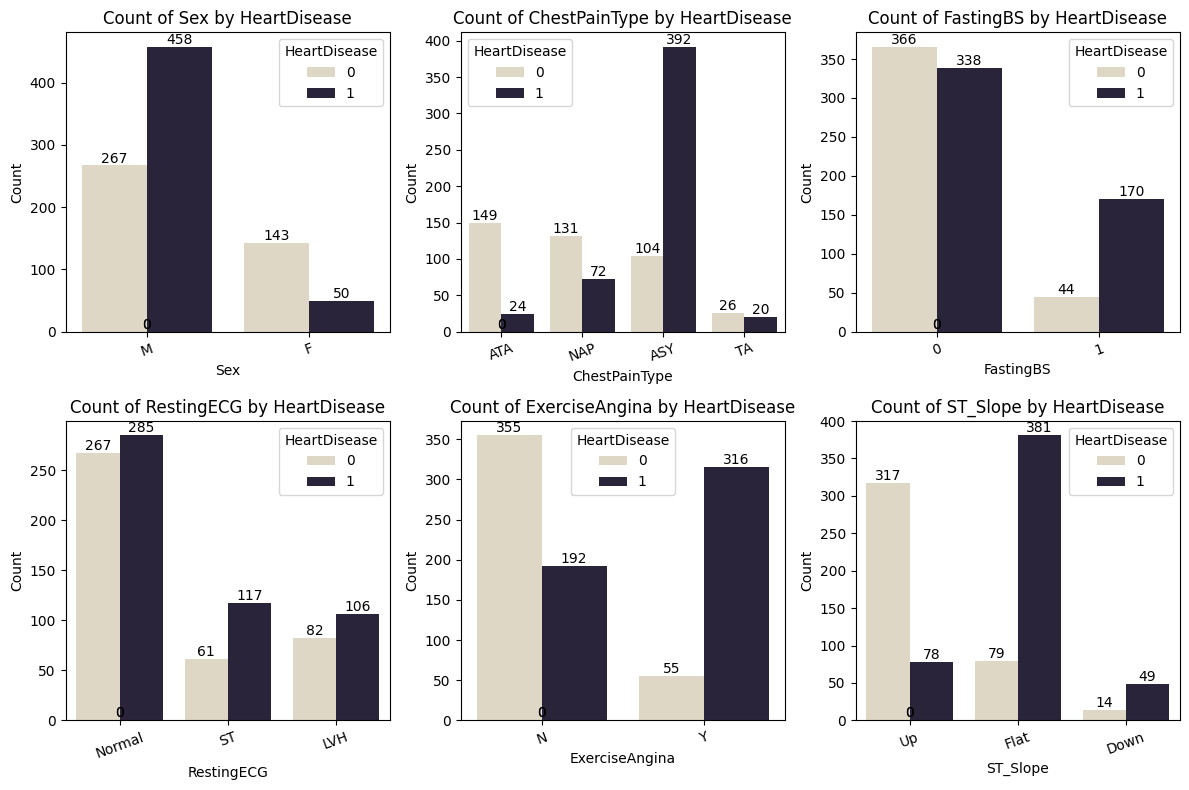

In [33]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(data=data, x=feature, hue='HeartDisease', ax=ax, palette='ch:s=-.2,r=.6')
    ax.set_title(f'Count of {feature} by HeartDisease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    color='black')

for i in range(len(categorical_features), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


2. From this hystograms we see that the most dangerous kind of pain is ASY and from the previous chunk we saw that it was distribution with the heavieas tails from ones with HeartDisease = 1, so HeartDisease with ASY may happen not only with old peaple.
3. It is almost the same chance to have HeartDisease if everuthing is Okay with FastingBS and it is much hier chance to have it if fasting blood sugar > 120  mg/dl.
4. It is much more chance to have the ilness if the patient gas ST.
5. If the patient has exercise-induced angina then it is a very high chance of the disease. Conversely, if he is not there, then most likely everything will be fine.
6. the last plot shows that if the patient has Up slope than it is more likely that they won't have disease and if it is Flat, than there is a big chance to have the disease.


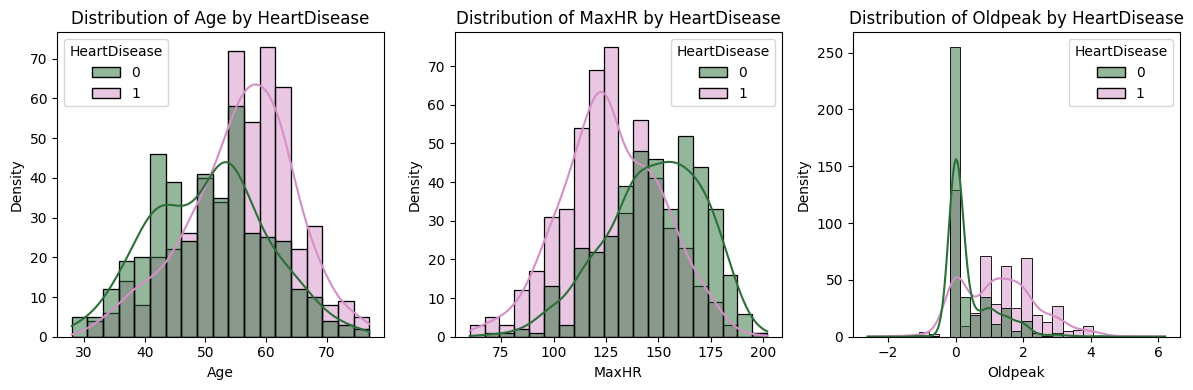

In [40]:
ord_features = ['RestingBP', 'Cholesterol']
numerical_features = ['Age', 'MaxHR', 'Oldpeak']


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.histplot(data=data, x=feature, hue='HeartDisease', kde=True, fill=True, ax=ax, palette='cubehelix')
    ax.set_title(f'Distribution of {feature} by HeartDisease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()



1. The pick age to have a disease is 60.
2. Peple with MAxHR +- 125 is more likely to have the disease.
3. If the patient gas Oldpeak = 0 then is is likely for them not to have a disease. And if not, they will most likely have a disease.

<Axes: >

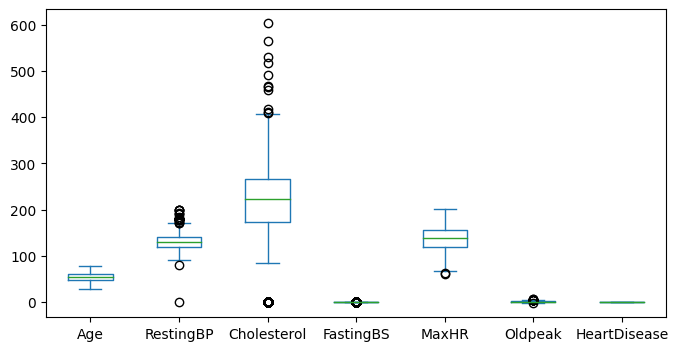

In [42]:
data.plot.box(figsize=(8, 4))

Cholestirol fiture has many outlayers, for example. But in case of 0 value it is'n actually an outlier. I would not filter them. I think, a specialist's consultation is necessary. Perhaps some of the indicators can be obtained with an error with a higher probability, and some on the contrary are important indicators

In order for the data to have the same impact, you need to bring them to the same scale.

In [65]:
data['Sex'].replace(['M','F'], [0,1], inplace=True)
data['ExerciseAngina'].replace(['N','Y'], [0,1], inplace=True)
features_to_encode = ["ChestPainType", "RestingECG", "ST_Slope"]
data = pd.get_dummies(data, columns=features_to_encode)
data.drop(['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],axis=1,inplace=True)
data

,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,0,0,0,False,True,False,False,False,True,False,False,False,True
1,1,0,0,1,False,False,True,False,False,True,False,False,True,False
2,0,0,0,0,False,True,False,False,False,False,True,False,False,True
3,1,0,1,1,True,False,False,False,False,True,False,False,True,False
4,0,0,0,0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,0,1,False,False,False,True,False,True,False,False,True,False
914,0,1,0,1,True,False,False,False,False,True,False,False,True,False
915,0,0,1,1,True,False,False,False,False,True,False,False,True,False
916,1,0,0,1,False,True,False,False,True,False,False,False,True,False


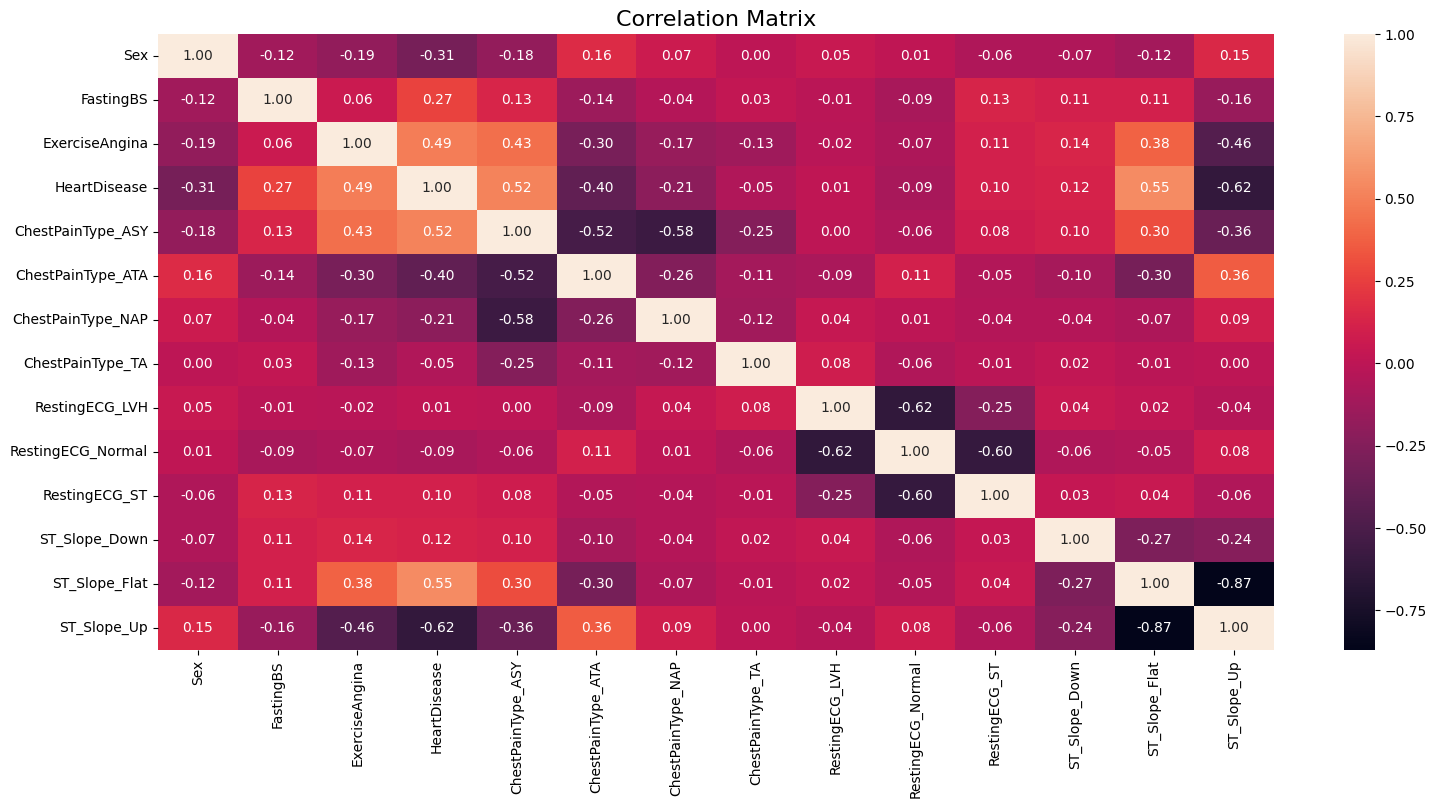

In [62]:

df_correlation = data.corr()

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

ASY, Ata pain types, ExerciseAngina and ST_Slope_up are the most correlated fituries with heart disease.

- Chest pain and a flat ST segment slope often indicate heart disease.
- Heart disease can cause angina pectoris triggered by physical activity.
- A downward sloping ST segment is linked to heart disease, while most people with an upward slope do not experience exercise-induced angina.
- People without heart disease typically show minimal ST segment deviations and a peak exercise value of 0, which is less likely to cause angina.
- Those with heart disease usually have a lower maximum heart rate.
- The risk of heart issues increases after age 55-60, however in this research most of the people were from this age group